In [1]:
import pandas as pd
pd.set_option('display.max_columns', 35)

epwfile = "./JPN_Osaka.477710_IWEC.epw"
labels = ["Year(-)","Month(-)","Day(-)","Hour(-)","Minute(-)","Data Source and Uncertainty Flags(-)",
          "Dry Bulb Temperature(degC)","Dew Point Temperature(degC)","Relative Humidity(%)",
          "Atmospheric Station Pressure(Pa)","Extraterrestrial Horizontal Radiation(Wh/m2)",
          "Extraterrestrial Direct Normal Radiation(Wh/m2)","Horizontal Infrared Radiation from Sky(Wh/m2)",
          "Global Horizontal Radiation(Wh/m2)","Direct Normal Radiation(Wh/m2)",
          "Diffuse Horizontal Radiation(Wh/m2)","Global Horizontal Illuminance(lx)",
          "Direct Normal Illuminance(lx)","Diffuse Horizontal Illiminance(lx)","Zenith Luminance(cd/m2)",
          "Wind Direction(deg)","Wind Speed(m/s)","Total Sky Cover(0-10)","Opaque Sky Cover(-)",
          "Visibility(km)","Ceiling Height(m)","Present Weather Observation(-)","Present Weather Code(-)",
          "Precipitable Water","Aerosol Optical Depth(-)","Snow Depth",
          "Days Since Last Snowfall day(day)","Albedo(-)","liquid precipitation depth(mm)",
          "liquid Precipitation quantity(h)"]
df_epw = pd.read_csv(epwfile, header=7, names=labels)

In [2]:
print(df_epw)

      Year(-)  Month(-)  Day(-)  Hour(-)  Minute(-)  \
0        1994         1       1        1         60   
1        1994         1       1        2         60   
2        1994         1       1        3         60   
3        1994         1       1        4         60   
4        1994         1       1        5         60   
...       ...       ...     ...      ...        ...   
8755     1984        12      31       20         60   
8756     1984        12      31       21         60   
8757     1984        12      31       22         60   
8758     1984        12      31       23         60   
8759     1984        12      31       24         60   

              Data Source and Uncertainty Flags(-)  \
0     C9C9C9*0*0?9?9?9?9?9?9?9*0B8B8*0B8*0*0E8*0*0   
1     C9C9C9*0*0?9?9?9?9?9?9?9*0B8B8*0B8*0*0E8*0*0   
2     C9C9C9*0*0?9?9?9?9?9?9?9A7A7E8*0A7A7*0E8*0*0   
3     C9C9C9*0*0?9?9?9?9?9?9?9*0B8B8*0B8*0*0E8*0*0   
4     C9C9C9*0*0?9?9?9?9?9?9?9*0B8B8*0B8*0*0E8*0*0   
...            

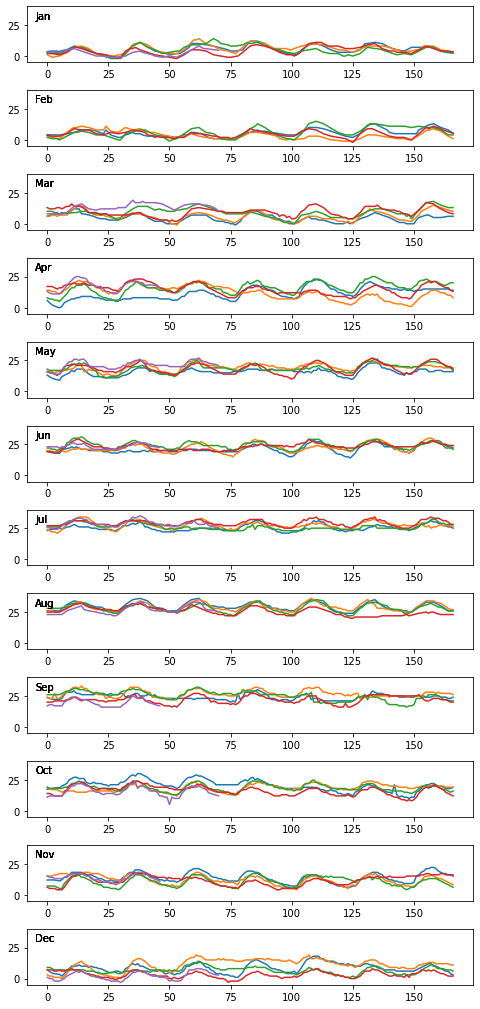

In [5]:
import matplotlib.pyplot as plt
import datetime

fig, axes = plt.subplots(12, figsize=(8.0, 18.0))
plt.subplots_adjust(hspace=0.5)
for i in range(12):
    data = df_epw[df_epw['Month(-)']==i+1]['Dry Bulb Temperature(degC)'].values
    begin = 0
    end = 24*7 - 1
    ax = axes[i]
    while begin < data.size - 1:
        ax.plot(data[begin:end])
        ax.set_ylim(-5, 40)
        ax.text(-5, 30, datetime.datetime(2021, i+1, 1).strftime('%b'))
        begin = end + 1
        end = min(end+24*7, data.size-1)

In [8]:
import calendar
import numpy as np

month = 12
daynum = calendar.monthrange(2021, month)[1]
db = np.reshape(df_epw[df_epw['Month(-)']==month]['Dry Bulb Temperature(degC)'].values, (daynum, 24, 1))

In [9]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# クラスタリングするデータ
data = db   
print(np.max(data),np.min(data))

# 前処理として標準化を行う
nm_data = TimeSeriesScalerMeanVariance().fit_transform(data)
print(np.max(nm_data),np.min(nm_data))

19.0 -3.0
2.4140393963016744 -2.083022575693182


In [10]:
# クラスタ数
n = 3

# 元データのプロットレンジ
ymax = 20
ymin = -5

# 標準化データのプロットレンジ
nm_ymax = 2.5
nm_ymin = -2.5